# MNist with Support Vector Machines

In this project we will try different type of classifier




## Helper libraries

As usual get our helpers

We still use `numpy` and `matplotlib` and `tqdm`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook, trange

# Import algorithms we'll use

We'll use SVC classifier which is extension of SVM to multiple classes

In [2]:
from sklearn.svm import SVC


And we'll  use some helper function provided by sklearn

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Loading the data

In [4]:
## Load the traning set
train_data = np.load('MNIST/train_data.npy')
train_labels = np.load('MNIST/train_labels.npy')

## Load the testing set
test_data = np.load('MNIST/test_data.npy')
test_labels = np.load('MNIST/test_labels.npy')

## Create the classifier instance

`sklearn` provides very uniform API to all it's algorithms,  so to create a different classifier just use different class name


In [5]:
# linear model

model_linear = SVC(kernel='linear')


In [6]:
# The calls to train the model and get predictions are exactly the same
model_linear.fit(X=train_data, y=train_labels)



SVC(kernel='linear')

In [7]:
# predict
y_pred = model_linear.predict(X=train_data)

Now let's try our classifier with the first 10 intances of the test data

In [8]:
predicted = model_linear.predict(test_data[0:10])

and see if it is working correctly

In [9]:
predicted[:10]

array([0, 2, 6, 5, 9, 6, 0, 7, 1, 1], dtype=uint8)

In [10]:
test_labels[0:10]

array([0, 2, 6, 5, 9, 6, 0, 7, 1, 1], dtype=uint8)

`sklearn` also provides utility functions like computing the accuracy score

In [11]:
accuracy_score(test_labels[0:10], y_pred=predicted)

1.0

Now let's run the classifier on the entire dataset.  Use the time magic to measure performance.

How does performance compare to kNN?

In [12]:
%time predicted = model_linear.predict(test_data)

CPU times: user 726 ms, sys: 4.31 ms, total: 730 ms
Wall time: 886 ms





### Check if we get the same accuracy


Use the impoted `accuracy_score` function to check if we get the same accuracy

In [13]:
accuracy_score(test_labels, y_pred=predicted)

0.909

# Let's look at missclassified digits

In [14]:
missed = (predicted - test_labels).nonzero()
missed

(array([ 17,  35,  39,  47,  60,  76,  87,  94,  98,  99, 122, 138, 152,
        181, 193, 217, 227, 237, 239, 242, 252, 254, 256, 261, 269, 270,
        277, 279, 287, 300, 305, 309, 316, 319, 321, 324, 338, 351, 358,
        362, 372, 377, 380, 398, 422, 429, 449, 453, 460, 472, 480, 498,
        500, 553, 575, 576, 587, 604, 618, 632, 637, 668, 715, 717, 741,
        756, 762, 779, 782, 786, 800, 802, 823, 828, 841, 849, 850, 877,
        883, 898, 918, 922, 930, 935, 936, 937, 938, 945, 976, 995, 997]),)

In [15]:
predicted[17], test_labels[17]

(4, 7)

### Let's examine missclassified instances

Execute the cell below to look at misclassified instances.  See if you can recognize a digit better than our algorithm?



In [16]:
missed = list(missed[0])

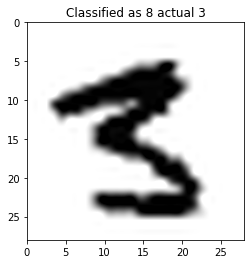

In [17]:
%matplotlib inline
m = missed.pop()
fig,ax = plt.subplots()
plt.imshow(np.zeros((28,28)) - test_data[m].reshape(28,28), cmap='gray', interpolation='spline36', extent=(0, 28, 28, 0))
ax.set_title(f'Classified as {predicted[m]} actual {test_labels[m]}')
plt.close(fig)
fig

# Confusion matrix

Confusion matrix summary gives a good overview of our model performance

In [18]:
print(confusion_matrix(y_true=test_labels, y_pred=predicted))

[[100   0   0   0   0   0   0   0   0   0]
 [  0  97   1   0   0   0   0   0   2   0]
 [  1   1  89   1   3   0   3   1   1   0]
 [  1   1   2  92   0   1   0   2   1   0]
 [  0   0   2   0  95   0   0   0   0   3]
 [  1   0   2   6   0  88   0   0   2   1]
 [  1   0   1   0   0   3  95   0   0   0]
 [  0   1   4   0   5   0   0  85   0   5]
 [  1   0   1   7   2   5   0   4  80   0]
 [  0   2   0   4   3   0   0   1   2  88]]


# Try different kernel

This time will try a polinomial kernel with a polynimial degree 3

In [19]:
non_linear_model = SVC(kernel='poly', degree=3)


### Train your model

In [20]:
non_linear_model.fit(X=train_data, y=train_labels)

SVC(kernel='poly')

### Get the predictions

In [21]:

%time predicted = non_linear_model.predict(test_data)

CPU times: user 931 ms, sys: 1.92 ms, total: 933 ms
Wall time: 1.37 s


In [4]:
### Examine the first 10 predictions

In [22]:
predicted[:10]

array([0, 2, 6, 5, 9, 6, 0, 7, 1, 1], dtype=uint8)

In [23]:
test_labels[:10]

array([0, 2, 6, 5, 9, 6, 0, 7, 1, 1], dtype=uint8)

#### Print out confusion matrix and accuracy score

In [24]:
print(confusion_matrix(y_true=test_labels, y_pred=predicted))

[[100   0   0   0   0   0   0   0   0   0]
 [  0  99   1   0   0   0   0   0   0   0]
 [  1   2  92   0   0   0   2   2   1   0]
 [  0   0   1  96   0   1   0   1   1   0]
 [  0   0   0   0  98   0   1   0   0   1]
 [  0   0   1   1   0  95   1   0   1   1]
 [  1   0   0   0   0   3  96   0   0   0]
 [  0   3   2   0   2   0   0  91   0   2]
 [  0   1   0   2   1   1   0   2  93   0]
 [  0   2   0   1   1   1   0   1   2  92]]


In [25]:
accuracy_score(test_labels, y_pred=predicted)

0.952



What can you say about the performance of non-linear kernels?

Try using different degree polynomials which what gives the best result?  

What can you say speed of different kernels performance?

# One more kernel to try

Now try to build the model using `rbf` kernel and parameters `C=5' 'gamma=0.0001'

In [94]:
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit( X=train_data, y=train_labels )

SVC(probability=True)

In [95]:
%time predicted = non_linear_model.predict(test_data)

CPU times: user 2.67 s, sys: 4 ms, total: 2.67 s
Wall time: 2.85 s


In [96]:
predicted[:10]

array([0, 2, 6, 5, 9, 6, 0, 7, 1, 1], dtype=uint8)

In [97]:
test_labels[:10]

array([0, 2, 6, 5, 9, 6, 0, 7, 1, 1], dtype=uint8)

In [98]:
print(confusion_matrix(y_true=test_labels, y_pred=predicted))

[[100   0   0   0   0   0   0   0   0   0]
 [  0  98   1   0   0   0   0   0   1   0]
 [  0   0  96   1   0   0   1   1   1   0]
 [  0   0   1  95   0   1   0   1   2   0]
 [  0   0   1   0  97   0   0   0   0   2]
 [  0   0   0   0   0  98   1   0   1   0]
 [  1   0   0   0   0   2  97   0   0   0]
 [  0   2   5   0   1   0   0  88   0   4]
 [  0   0   0   1   1   0   0   1  97   0]
 [  0   2   0   1   1   2   0   1   3  90]]


In [99]:
accuracy_score(test_labels, y_pred=predicted)

0.956

In [80]:
non_linear_model.get_params( )

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

How is the accuracy of this kernel?  What can you say about the importance of parameters.

Repeat this excercise with the default parameters to 'rbf' kernel

# Questions to think about

   * How is the accuracy of the SVC classifer compared to the kNN?
    
   * What can you say about the time it takes to prepare the model?

   * What about the time to get predictions?
    
   * If you are to run production digit recognizer which classifier would you choose?

# Record your results

Again, don't forget to record your results

# The end